Quantum Generator Circuit:
        ┌─────────────┐ ░ ┌─┐
     q: ┤ Ry(-0.1428) ├─░─┤M├
        └─────────────┘ ░ └╥┘
meas: 1/═══════════════════╩═
                           0 


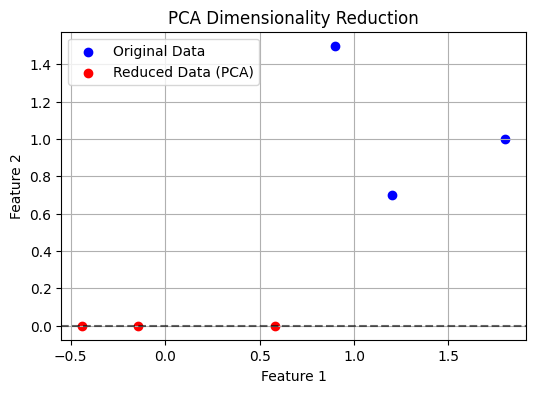

Hybrid QGAN Simulation Result: {'1': 6, '0': 994}


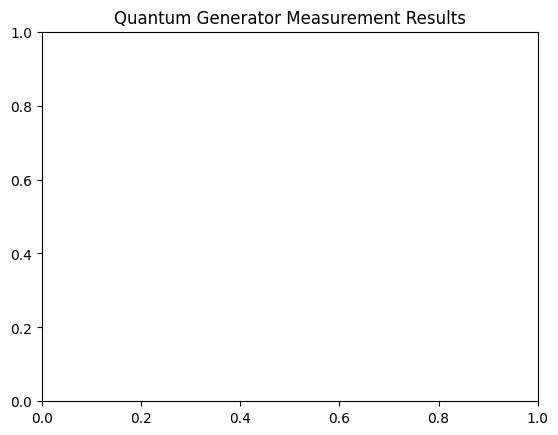

In [1]:
#-------------------------------------------------------------------------
# Hybrid QGAN Workflow 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

# Classical preprocessing: Perform PCA on input data
data = np.array([[1.2, 0.7], [0.9, 1.5], [1.8, 1.0]])
pca  = PCA(n_components=1)
reduced_data = pca.fit_transform(data)

# Quantum generator for reduced data
qc = QuantumCircuit(1)
qc.ry(reduced_data[0][0], 0)
qc.measure_all()

# Display the quantum circuit
print("Quantum Generator Circuit:")
print(qc)
qc.draw('mpl')

# Simulate the quantum generator
backend = Aer.get_backend('aer_simulator')
result  = execute(qc, backend, shots=1000).result()
counts  = result.get_counts()

# Plot PCA results
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(reduced_data, np.zeros_like(reduced_data), label="Reduced Data (PCA)", color='red')
plt.axhline(0, color='black', linestyle="--", alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PCA Dimensionality Reduction")
plt.legend()
plt.grid(True)
plt.show()

# Print and visualize measurement results
print("Hybrid QGAN Simulation Result:", counts)
plot_histogram(counts)
plt.title("Quantum Generator Measurement Results")
plt.show()
